In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk

In [2]:
data = pd.read_csv('data/en_dataset.csv')
data.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,call sis im boy girl still faggot shut,offensive,indirect,confusion_disgust,origin,gay
1,2,@user @user legit nilas retarded idk,offensive_disrespectful,indirect,anger_confusion,disability,special_needs
2,3,said retard @url,fearful_abusive_offensive_hateful,indirect,confusion_disgust,disability,special_needs
3,4,america another 8 years obama's ideology via h...,fearful_abusive_hateful_disrespectful_normal,indirect,anger_fear_shock_sadness_disgust,origin,other
4,5,@user don... fucking made cry twat.,offensive,indirect,shock_disgust,gender,women


In [3]:
data.columns

Index(['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment',
       'target', 'group'],
      dtype='object')

In [4]:
data.describe()

,HITId
count,5647.000000
mean,2824.000000
std,1630.292816
min,1.000000
25%,1412.500000
50%,2824.000000
75%,4235.500000
max,5647.000000


In [5]:
data['sentiment'].unique()
data['sentiment'].value_counts()

sentiment
offensive                                          2954
normal                                              661
hateful                                             315
offensive_hateful                                   252
offensive_disrespectful                             145
abusive_offensive                                   115
offensive_normal                                    114
hateful_disrespectful                                96
abusive_hateful                                      90
fearful_abusive_offensive_hateful_disrespectful      85
hateful_normal                                       79
disrespectful_normal                                 69
fearful_abusive_offensive_hateful_normal             62
fearful_offensive_hateful_disrespectful_normal       61
fearful_abusive_offensive_disrespectful_normal       53
abusive_offensive_hateful_disrespectful_normal       53
abusive_disrespectful                                50
fearful_offensive                     

['indirect' 'direct']


<Axes: >

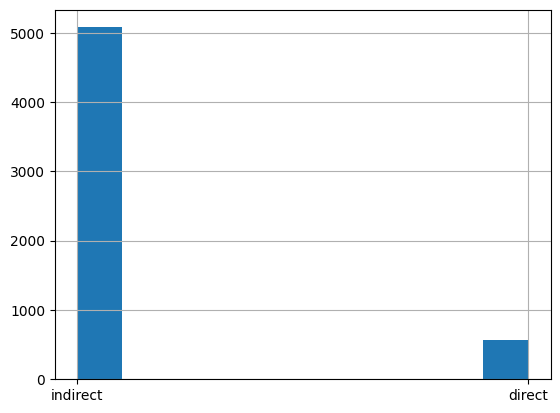

In [6]:
print(data['directness'].unique())
data['directness'].hist()

In [7]:
data['annotator_sentiment'].unique()
data['annotator_sentiment'].value_counts()

annotator_sentiment
anger_disgust                      557
sadness_disgust                    373
indifference_disgust               365
anger_sadness                      334
sadness_indifference               311
                                  ... 
anger_confusion_sadness_shock        2
anger_confusion_fear_shock           2
fear_shock_sadness_disgust           2
anger_fear_indifference_sadness      2
anger_fear_indifference_disgust      1
Name: count, Length: 71, dtype: int64

target
origin                2448
disability            1089
other                  890
gender                 638
sexual_orientation     514
religion                68
Name: count, dtype: int64


<Axes: >

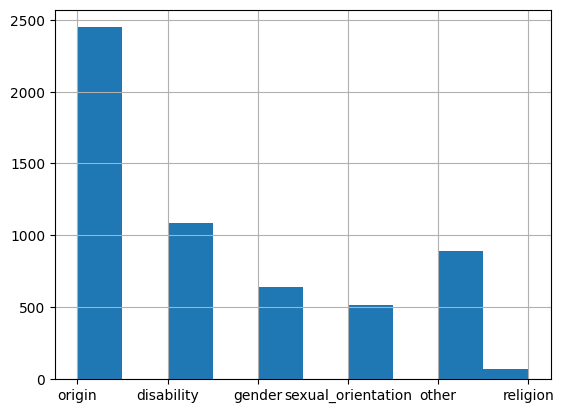

In [12]:
print(data['target'].value_counts())
data['target'].hist()

In [9]:
data['group'].unique()
data['group'].value_counts()

group
other               1590
special_needs       1571
women                878
individual           497
left_wing_people     177
refugees             171
gay                  163
immigrants           130
hispanics            105
muslims              101
african_descent       86
indian/hindu          83
asians                61
jews                  24
arabs                  6
christian              4
Name: count, dtype: int64

## Tweets

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing to the tweet column
data['processed_tweets'] = data['tweet'].apply(preprocess_text)

# Flatten the list of lists into a single list of words
all_words = [word for tweet in data['processed_tweets'] for word in tweet]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top N words
top_n = 100
top_words = word_freq.most_common(top_n)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
print("Top words:", top_words)

Top words: [('user', 4425), ('url', 2326), ('retarded', 622), ('retard', 616), ('faggot', 545), ('shithole', 501), ('cunt', 473), ('twat', 435), ('like', 393), ('im', 370), ('ching', 367), ('chong', 360), ('fucking', 322), ('country', 288), ('spic', 277), ('nigger', 251), ('people', 244), ('countries', 239), ('mongoloid', 218), ('get', 198), ('fuck', 192), ('u', 187), ('go', 170), ('one', 165), ('called', 157), ('got', 156), ('say', 141), ('illegal', 141), ('negro', 139), ('ass', 136), ('immigrants', 135), ('know', 133), ('shit', 131), ('back', 130), ('cant', 129), ('would', 128), ('dyke', 126), ('white', 125), ('hes', 121), ('even', 118), ('think', 111), ('aliens', 106), ('mongy', 104), ('call', 102), ('na', 100), ('mongol', 100), ('said', 95), ('time', 95), ('refugees', 94), ('amp', 92), ('man', 91), ('trump', 91), ('thats', 91), ('never', 90), ('want', 89), ('look', 89), ('lol', 86), ('bitch', 83), ('really', 83), ('right', 81), ('okay', 81), ('feminazi', 81), ('leftist', 79), ('sti